In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from skimpy import skim

In [4]:
df=pd.read_csv(r'C:\Users\Saravanan\OneDrive\Desktop\Machine Learning\Student_Marks.csv')

In [5]:
df

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299
...,...,...,...
95,6,3.561,19.128
96,3,0.301,5.609
97,4,7.163,41.444
98,7,0.309,12.027


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number_courses  100 non-null    int64  
 1   time_study      100 non-null    float64
 2   Marks           100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [7]:
df.duplicated().sum()

0

In [9]:
df.corr()

,number_courses,time_study,Marks
number_courses,1.000000,0.204844,0.417335
time_study,0.204844,1.000000,0.942254
Marks,0.417335,0.942254,1.000000


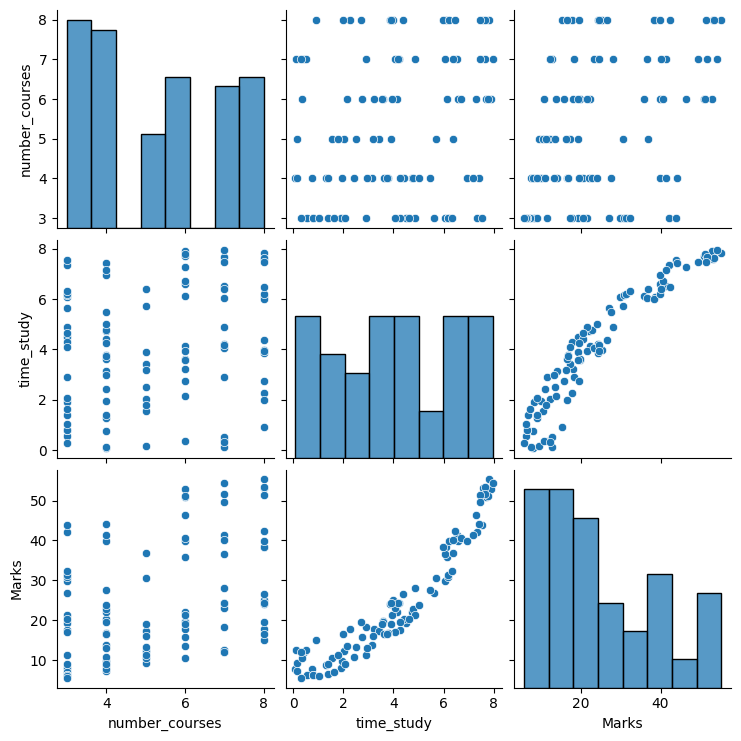

In [11]:
sns.pairplot(df)
plt.show()

<Axes: xlabel='number_courses', ylabel='count'>

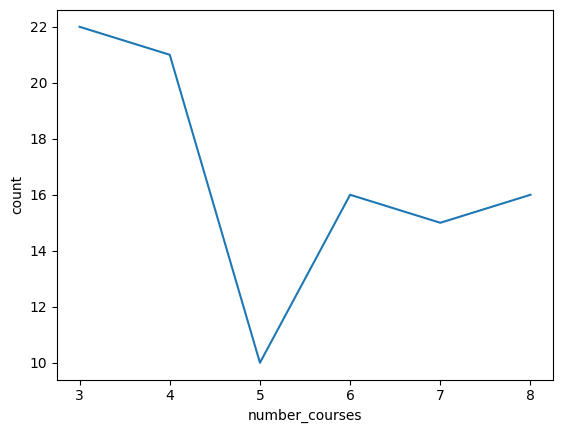

In [12]:
sns.lineplot(df.number_courses.value_counts())

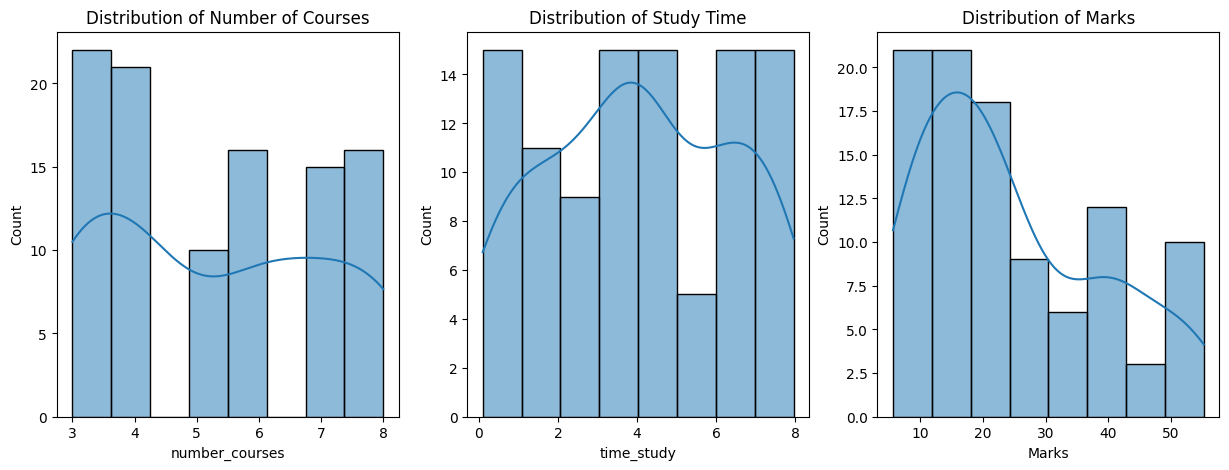

In [13]:
# 5. Distribution Plots
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['number_courses'], kde=True)
plt.title('Distribution of Number of Courses')

plt.subplot(1, 3, 2)
sns.histplot(df['time_study'], kde=True)
plt.title('Distribution of Study Time')

plt.subplot(1, 3, 3)
sns.histplot(df['Marks'], kde=True)
plt.title('Distribution of Marks')

plt.show()